It's comprises of two data sets: red wine and white white, the two data was merged together 
The aim is to predict the quality of wine based on the data given

In [1]:
#importing all the necessary libaries and model to the working environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib

# Modelling
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the first dataset
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')

#creating a new column Type
red_wine['Type'] = 'Red'

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [3]:
# Load the second dataset
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')


white_wine['Type'] = 'White'

#display the first five rows of the dataframe
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [6]:
#merge the red and white dataset together
data = pd.merge(red_wine, white_wine, how= 'outer')
data.to_csv('WINE.csv, index=False')

# Display the first few rows of the dataframe
data.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Red
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Red
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,Red
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,Red
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,Red


In [7]:
#checking for the shape od the dataset
data.shape

(6497, 13)

The dataset comprises of 6497 rows and 13 columns

In [8]:
# Display the information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [9]:
#check the dtypes

data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Type                     object
dtype: object

In [10]:
# Display the summary statistics of the dataframe
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
#checking for the missing values

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

In [12]:
#replacing Type column to a numeric value
data['Type'] = data['Type'].replace({'Red': 0, 'White':1})

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


There's no missing value found

In [13]:
#check for duplicte values

data.duplicated().sum()

1177

1177 duplicated values was found which will be handle before proceeding.
The reason it called for a rapt attention is to avoid or reduce bias in machine learning which can lead to overfitting, imbalance, misinterpretation.

In [14]:
#handling duplicate data by dropping it

data.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [15]:
#check for unique value in quality

data['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [16]:
#change the dtype of qualityto object to avoid the model seeing it as regression problem

#data['quality'] = data['quality'].astype('object')

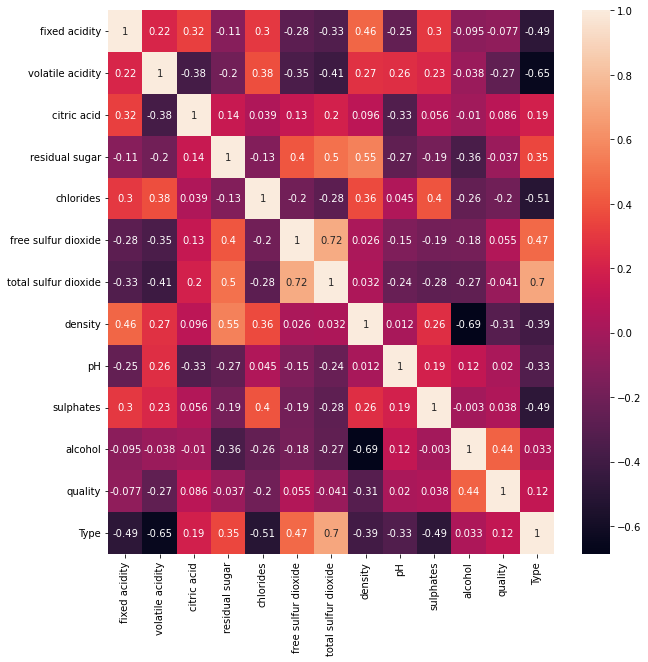

In [17]:
#exploratory data analysis

fig = plt.figure(figsize=(10,10))
corr_matrix =data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

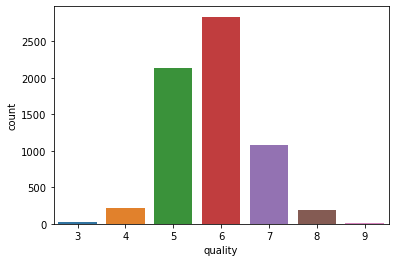

In [18]:
#class distribution to know if the target column is balance

sns.countplot(x='quality', data=data)

The target is imbalance, this will be handle by using undersampling, oversampling and SMOTE

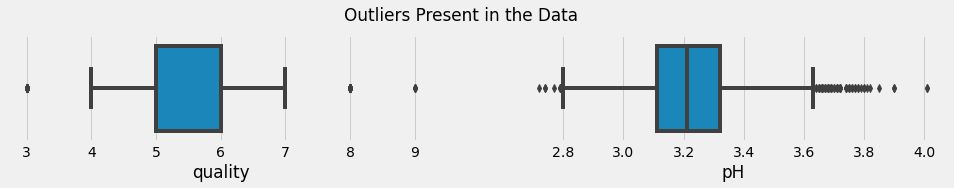

In [19]:
# univariate analysis on numerical columns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(2, 2, 1)
sns.boxplot(data['quality'])

plt.subplot(2, 2, 2)
sns.boxplot(data['pH'])


plt.suptitle('Outliers Present in the Data')
plt.show()

There is outlier in the dataset which will be handle before proceeding to the next step. 

In [20]:

from scipy.stats import zscore

# Function to remove outliers based on Z-scores
def remove_outliers(data, threshold=3):
    """
    Removes rows with outliers based on Z-scores.
    Args:
    - df: DataFrame with potential outliers
    - threshold: Z-score threshold for identifying outliers
    """
    
    # Calculate Z-scores for each column
    z_scores = data.apply(zscore, axis=0)
    
    # Identify outliers (Z-score > threshold or < -threshold)
    outliers = (np.abs(z_scores) > threshold)
    
    # Remove rows with outliers in any column
    data_cleaned = data[~outliers.any(axis=1)]
    
    return data_cleaned

# Remove outliers from the Wine dataset
data_cleaned = remove_outliers(data, threshold=3)

# Display the cleaned data (after removing outliers)
print("Wine Data after Removing Outliers:")
print(data_cleaned.head())


Wine Data after Removing Outliers:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.4              0.70         0.00             1.9      0.076   
3            7.8              0.76         0.04             2.3      0.092   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 11.0                  34.0   0.9978  3.51       0.56   
3                 15.0                  54.0   0.9970  3.26       0.65   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   

   alcohol  quality  Type  
0      9.4        5    

In [21]:

# Define sampling methods
#sampling_method = {
    #'Undersampling': RandomUnderSampler(random_state=42),
    #'Oversampling': RandomOverSampler(random_state=42),
    #'SMOTE': SMOTE(random_state=42, k_neighbors=3)
#}

# Fit and transform the target variable 'quality' using OrdinalEncoder
#encoder = OrdinalEncoder()
#data['quality'] = encoder.fit_transform(data[['quality']])

# Define features and target variable
#X = data.drop(columns=['quality'])
#y = data['quality']

# Loop through sampling methods and apply resampling
#for method_name, sampler in sampling_method.items():
    #print(f"Using {method_name} sampling method")

    # Apply resampling technique
    #X_resampled, y_resampled = sampler.fit_resample(X, y)

    # Show the class distribution after resampling
    #print(f"Class distribution after {method_name} resampling:")
    #print(pd.Series(y_resampled).value_counts())
    #print('='*35)

# Now you can continue with model training using the resampled datasets


In [22]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,)

# Scale numerical features
#scaler = StandardScaler()
#X_train= scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


print('Data preprocessing completed.')

Data preprocessing completed.


In [23]:
def evaluate_classification_model(true, predicted, average='macro'):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average=average)  # For multi-class
    recall = recall_score(true, predicted, average=average)  # For multi-class
    f1 = f1_score(true, predicted, average=average)  # For multi-class
    
    return accuracy, precision, recall, f1

In [24]:
# Loop through sampling methods and models
best_model = None
best_method = None
best_model_score = -1
best_model_name = ''

In [25]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "SVC": SVC(),
    "RidgeClassifier": RidgeClassifier(),
    "BaggingClassifier": BaggingClassifier(), 
    "GradientBoostingClassifier": GradientBoostingClassifier()
}

# Define sampling methods
sampling_method = {
    'Undersampling': RandomUnderSampler(random_state=42),
    'Oversampling': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42, k_neighbors=3)
}
# Fit and transform the target variable 'quality' using OrdinalEncoder
encoder = OrdinalEncoder()
data['quality'] = encoder.fit_transform(data[['quality']])

# Define features and target variable
X = data.drop(columns=['quality'])
y = data['quality']
# Split the data into training and testing sets before looping through sampling methods
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through sampling methods and models
for method_name, sampler in sampling_method.items():
    print(f"Using {method_name} sampling method")

    # Apply resampling technique
    X_resampled, y_resampled = sampler.fit_resample(X, y)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_rescaled = scaler.fit_transform(X_resampled)
    X_test_rescaled = scaler.transform(X_test)

    # Show the class distribution after resampling
    print(f"Class distribution after {method_name} resampling:")
    print(pd.Series(y_resampled).value_counts())
    print('='*35)
    
    # Loop through each model
    for model_name, model in models.items():
        print(f"Training {model_name}...")

        # Train the model on the resampled data
        model.fit(X_train_rescaled, y_resampled)

        # Make predictions
        y_train_pred = model.predict(X_train_rescaled)
        y_test_pred = model.predict(X_test_rescaled)

        # Evaluate performance on the training set
        train_accuracy = accuracy_score(y_resampled, y_train_pred)
        train_precision = precision_score(y_resampled, y_train_pred, average='macro')
        train_recall = recall_score(y_resampled, y_train_pred, average='macro')
        train_f1 = f1_score(y_resampled, y_train_pred, average='macro')

        # Evaluate performance on the test set
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='macro')
        test_recall = recall_score(y_test, y_test_pred, average='macro')
        test_f1 = f1_score(y_test, y_test_pred, average='macro')

        # Output results
        print(f"Model performance for {model_name} using {method_name} resampling:")

        # Training set performance
        print("Model performance for Training set:")
        print(f"- Accuracy: {train_accuracy:.4f}")
        print(f"- Precision: {train_precision:.4f}")
        print(f"- Recall: {train_recall:.4f}")
        print(f"- F1 Score: {train_f1:.4f}")
        print('----------------------------------')

        # Test set performance
        print("Model performance for Test set:")
        print(f"- Accuracy: {test_accuracy:.4f}")
        print(f"- Precision: {test_precision:.4f}")
        print(f"- Recall: {test_recall:.4f}")
        print(f"- F1 Score: {test_f1:.4f}")
        print('='*35)
        
        # Track the best performing model
        if test_f1 > best_model_score:
            best_model_score = test_f1
            best_model_name = model_name
            best_method = method_name
            best_model = model

    
    print('\n')  # Separate different sampling methods output
        

Using Undersampling sampling method
Class distribution after Undersampling resampling:
0.0    5
1.0    5
2.0    5
3.0    5
4.0    5
5.0    5
6.0    5
Name: quality, dtype: int64
Training Logistic Regression...
Model performance for Logistic Regression using Undersampling resampling:
Model performance for Training set:
- Accuracy: 0.8286
- Precision: 0.8571
- Recall: 0.8286
- F1 Score: 0.8247
----------------------------------
Model performance for Test set:
- Accuracy: 0.2185
- Precision: 0.1766
- Recall: 0.3434
- F1 Score: 0.1464
Training K-Neighbors Classifier...
Model performance for K-Neighbors Classifier using Undersampling resampling:
Model performance for Training set:
- Accuracy: 0.4000
- Precision: 0.3565
- Recall: 0.4000
- F1 Score: 0.3587
----------------------------------
Model performance for Test set:
- Accuracy: 0.2177
- Precision: 0.1614
- Recall: 0.3073
- F1 Score: 0.1330
Training Decision Tree...
Model performance for Decision Tree using Undersampling resampling:
Mode

Model performance for BaggingClassifier using Oversampling resampling:
Model performance for Training set:
- Accuracy: 0.9966
- Precision: 0.9966
- Recall: 0.9966
- F1 Score: 0.9966
----------------------------------
Model performance for Test set:
- Accuracy: 0.9900
- Precision: 0.9241
- Recall: 0.9954
- F1 Score: 0.9478
Training GradientBoostingClassifier...
Model performance for GradientBoostingClassifier using Oversampling resampling:
Model performance for Training set:
- Accuracy: 0.8111
- Precision: 0.8032
- Recall: 0.8111
- F1 Score: 0.8057
----------------------------------
Model performance for Test set:
- Accuracy: 0.5692
- Precision: 0.5544
- Recall: 0.7650
- F1 Score: 0.6044


Using SMOTE sampling method
Class distribution after SMOTE resampling:
2.0    2836
3.0    2836
4.0    2836
1.0    2836
5.0    2836
0.0    2836
6.0    2836
Name: quality, dtype: int64
Training Logistic Regression...
Model performance for Logistic Regression using SMOTE resampling:
Model performance for

None of the models perform well on testing set using undersampling techniques to handle the imbalance

KNN, XBGClassifier, CatBoostClassifier and BaggingClassifier perform well using oversampling and SMOTE with 
**Training: 0.90, 0.98, 0.96, 0.99**
**Testing: 0.70, 0.96, 0.89, 0.98**
respectively

<AxesSubplot:xlabel='quality', ylabel='count'>

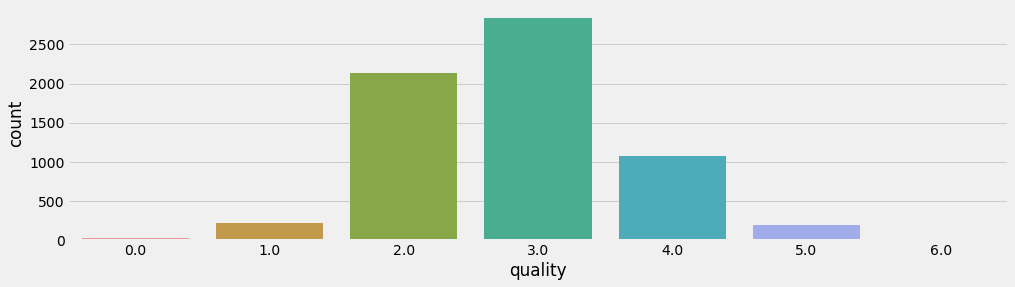

In [27]:
sns.countplot(x='quality', data=data)

## Hyperparameters tunning



# Define hyperparameter grids for some models
param_grids = {
    "XGBClassifier": {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200]
    },
    "CatBoost Classifier": {
        'iterations': [100, 200],
        'learning_rate': [0.01, 0.1],
        'depth': [6, 10, 12]
    },
    "BaggingClassifier": {
        'n_estimators': [50, 100],
        'max_samples': [0.5, 1.0]
    }
}


# Create a dictionary to store the best models after hyperparameter tuning
best_models = {}

# Loop through each of the top-performing models
for model_name in ['XGBClassifier', 'CatBoost Classifier', 'BaggingClassifier']:
    print(f"Tuning hyperparameters for {model_name}...")
    
    # Define the model (assuming the models dictionary exists)
    model = models[model_name]  # Reuse the model from the previous dictionary
    
    # Define the parameter grid for the model
    param_grid = param_grids[model_name]
    
    if model_name == "CatBoost Classifier":
        # Use RandomizedSearchCV for CatBoost instead of GridSearchCV
        print("Using RandomizedSearchCV for CatBoost...")
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                           n_iter=5, cv=3, scoring='accuracy', 
                                           n_jobs=-1, verbose=2, random_state=42)
        
        # Optionally, use a smaller subset of the data for faster tuning
        X_train_sub, _, y_train_sub, _ = train_test_split(X_train_rescaled, y_resampled, test_size=0.9, random_state=42)
        random_search.fit(X_train_sub, y_train_sub)
        
        # Store the best model
        best_models[model_name] = random_search.best_estimator_
        
        # Print the best parameters and best score
        print(f"Best parameters for {model_name}: {random_search.best_params_}")
        print(f"Best cross-validation accuracy for {model_name}: {random_search.best_score_:.4f}")
    
    else:
        # For other models, use GridSearchCV as before
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                                   cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train_rescaled, y_resampled)
        
        best_models[model_name] = grid_search.best_estimator_
        
        # Print the best parameters and best score
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")
    
    print("=" * 45)

# After hyperparameter tuning, evaluate on the test set
best_model_name = None
best_test_accuracy = 0

# Loop through each best model and evaluate on the test data
for model_name, best_model in best_models.items():
    print(f"Evaluating best model {model_name} on the test set...")
    
    # Make predictions
    y_test_pred = best_model.predict(X_test_rescaled)
    
    # Evaluate performance on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')

    # Output the performance
    print(f"Test set performance for {model_name}:")
    print(f"- Accuracy: {test_accuracy:.4f}")
    print(f"- Precision: {test_precision:.4f}")
    print(f"- Recall: {test_recall:.4f}")
    print(f"- F1 Score: {test_f1:.4f}")
    
    # Track the best model based on F1 score
    if test_f1 > best_test_accuracy:
        best_test_accuracy = test_f1
        best_model_name = model_name

# Print the best model after tuning
print(f"\nThe best model after hyperparameter tuning is {best_model_name} with an F1 score of {best_test_accuracy:.4f}")


In [25]:


# Define the parameter grids for each model
param_grids = {
    "XGBClassifier": {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200]
    },
    "CatBoost Classifier": {
        'iterations': [100, 200],
        'learning_rate': [0.01, 0.1],
        'depth': [6, 10, 12]
    }
    #"BaggingClassifier": {
        #'n_estimators': [50, 100],
        #'max_samples': [0.5, 1.0]
   # },
   # "KNeighborsClassifier": {
        #'n_neighbors': [3, 5, 7, 10],
        #'weights': ['uniform', 'distance'],
        #'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
   # }
}

# Create a dictionary to store the best models after hyperparameter tuning
best_models = {}

# Initialize the models
models = {
    "XGBClassifier": XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(silent=True)  # 'silent=True' suppresses warnings for CatBoost
    #"BaggingClassifier": BaggingClassifier(),
    #"KNeighborsClassifier": KNeighborsClassifier()
}

# Loop through each of the top-performing models
for model_name in ['XGBClassifier', 'CatBoost Classifier']:
    print(f"Tuning hyperparameters for {model_name}...")

    # Define the model (assuming the models dictionary exists)
    model = models[model_name]  # Reuse the model from the dictionary
    
    # Define the parameter grid for the model
    param_grid = param_grids[model_name]
    
    if model_name == "CatBoost Classifier":
        # Use RandomizedSearchCV for CatBoost instead of GridSearchCV
        print("Using RandomizedSearchCV for CatBoost...")
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                           n_iter=5, cv=3, scoring='accuracy', 
                                           n_jobs=-1, verbose=2, random_state=42)
        
        # Optionally, use a smaller subset of the data for faster tuning
        X_train_sub, _, y_train_sub, _ = train_test_split(X_train_rescaled, y_resampled, test_size=0.9, random_state=42)
        random_search.fit(X_train_sub, y_train_sub)
        
        # Store the best model
        best_models[model_name] = random_search.best_estimator_
        
        # Print the best parameters and best score
        print(f"Best parameters for {model_name}: {random_search.best_params_}")
        print(f"Best cross-validation accuracy for {model_name}: {random_search.best_score_:.4f}")
    
    else:
        # For other models, use GridSearchCV as before
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                                   cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train_rescaled, y_resampled)
        
        best_models[model_name] = grid_search.best_estimator_
        
        # Print the best parameters and best score
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")
    
    print("=" * 45)

# After hyperparameter tuning, evaluate on the test set
best_model_name = None
best_test_accuracy = 0

# Loop through each best model and evaluate on the test data
for model_name, best_model in best_models.items():
    print(f"Evaluating best model {model_name} on the test set...")
    
    # Make predictions
    y_test_pred = best_model.predict(X_test_rescaled)
    
    # Evaluate performance on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')

    # Output the performance
    print(f"Test set performance for {model_name}:")
    print(f"- Accuracy: {test_accuracy:.4f}")
    print(f"- Precision: {test_precision:.4f}")
    print(f"- Recall: {test_recall:.4f}")
    print(f"- F1 Score: {test_f1:.4f}")
    
    # Track the best model based on F1 score
    if test_f1 > best_test_accuracy:
        best_test_accuracy = test_f1
        best_model_name = model_name

# Print the best model after tuning
print(f"\nThe best model after hyperparameter tuning is {best_model_name} with an F1 score of {best_test_accuracy:.4f}")


Tuning hyperparameters for XGBClassifier...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for XGBClassifier: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best cross-validation accuracy for XGBClassifier: 0.8326
Tuning hyperparameters for CatBoost Classifier...
Using RandomizedSearchCV for CatBoost...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for CatBoost Classifier: {'learning_rate': 0.1, 'iterations': 100, 'depth': 10}
Best cross-validation accuracy for CatBoost Classifier: 0.6937
Evaluating best model XGBClassifier on the test set...
Test set performance for XGBClassifier:
- Accuracy: 0.9992
- Precision: 0.9997
- Recall: 0.9997
- F1 Score: 0.9997
Evaluating best model CatBoost Classifier on the test set...
Test set performance for CatBoost Classifier:
- Accuracy: 0.4623
- Precision: 0.3287
- Recall: 0.6870
- F1 Score: 0.3583

The best model after hyperparameter tuning is XGBClassifier with an F1 score of 

In [27]:
# Save the best model in a .h5 file (using joblib)
best_model = best_models[best_model_name]
model_filename = f"best_model_{best_model_name}.h5"

# Save the model using joblib
joblib.dump(best_model, model_filename)

print(f"The best model has been saved to {model_filename}")

The best model has been saved to best_model_XGBClassifier.h5


In [29]:
red_wine.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
1392,7.1,0.62,0.06,1.3,0.07,5.0,12.0,0.9942,3.17,0.48,9.8,5,Red


In [30]:
h = np.array([9.9, 0.54, 0.45, 2.3, 0.071, 16.0, 40.0, 0.9991, 3.39, 0.62, 9.4, 0])

In [32]:
k = h.reshape(1,-1)
k

array([[ 9.9   ,  0.54  ,  0.45  ,  2.3   ,  0.071 , 16.    , 40.    ,
         0.9991,  3.39  ,  0.62  ,  9.4   ,  0.    ]])

In [33]:
kk = scaler.transform(k)

In [35]:
joblib.load("best_model_XGBClassifier.h5").predict(kk)

array([2], dtype=int64)

In [36]:
data['quality'].unique()

array([2., 3., 4., 1., 5., 0., 6.])